Processing ../computing/analysis/ppmi/60_70/comparison/pd/graph_differences.csv...


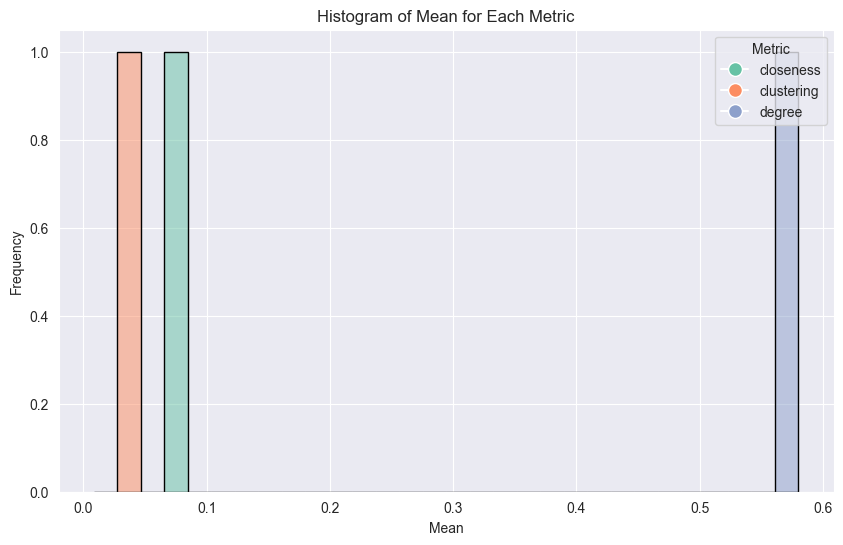

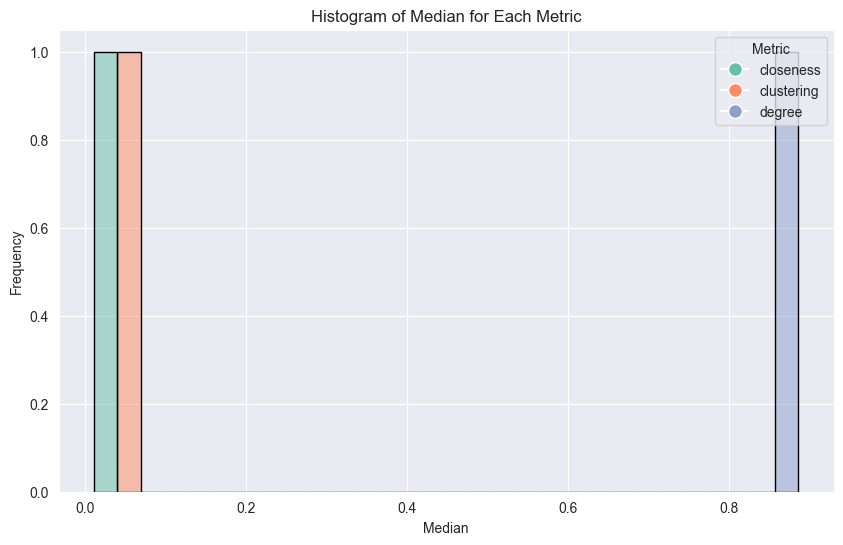

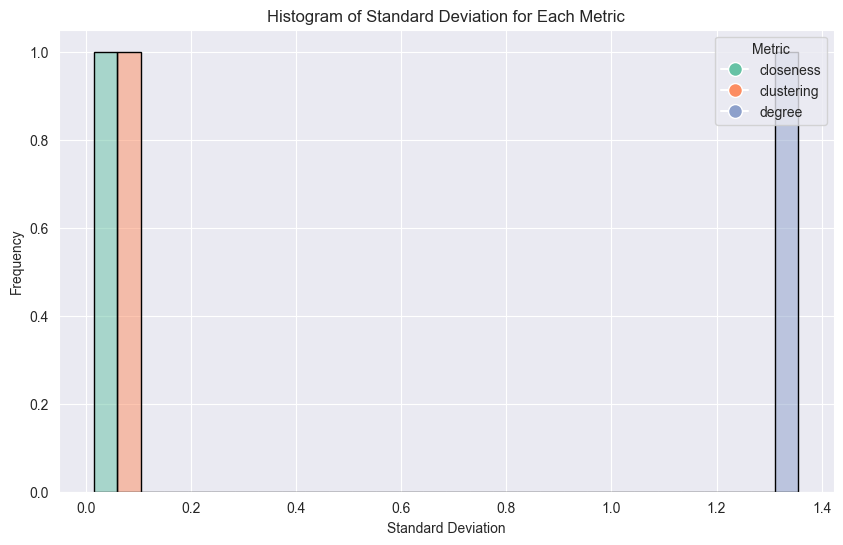

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Plot a histogram for each metric (Mean, Median, and Standard Deviation)
def plot_histogram(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))

    # Plot the histogram with KDE and distinct colors for each metric using `hue`
    ax = sns.histplot(data=data, x=column, hue='Metric', kde=True, bins=10, multiple="dodge", palette='Set2', edgecolor='black')

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Manually add the legend with the correct labels
    # Directly specify the labels and colors for each metric (based on the palette 'Set2')
    handles, labels = [], []
    for metric in data['Metric'].unique():
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=metric,
                                  markerfacecolor=sns.color_palette('Set2')[list(data['Metric'].unique()).index(metric)], markersize=10))
        labels.append(metric)

    # Add the legend with title "Metric"
    plt.legend(handles=handles, labels=labels, title="Metric", loc='upper right')

    # Show the plot
    plt.show()

# Function to process the graph_differences.csv file and return the data
def process_graph_differences_file(file_path):
    data = load_data(file_path)

    # Verifica se la colonna 'Metric', 'Mean', 'Median', 'Standard Deviation' esistono nel file
    if 'Metric' not in data.columns or 'Mean' not in data.columns or 'Median' not in data.columns or 'Standard Deviation' not in data.columns:
        print(f"Warning: Missing columns in {file_path}. Skipping this file.")
        return None

    return data

# Main function to visualize data from the specified graph_differences.csv file
def visualize_graph_differences(file_path):
    # Check if the file exists
    if os.path.exists(file_path):
        print(f"Processing {file_path}...")

        # Process the file and load data
        data = process_graph_differences_file(file_path)
        if data is not None:
            # Plot the histogram for Mean, Median, and Standard Deviation for each metric
            for column in ['Mean', 'Median', 'Standard Deviation']:
                plot_histogram(data, column, f'Histogram of {column} for Each Metric', column, 'Frequency')
        else:
            print("No valid data found to visualize.")
    else:
        print(f"File {file_path} not found.")


# Example usage: specify the path of the graph_differences.csv file
visualize_graph_differences('../computing/analysis/ppmi/60_70/comparison/pd/graph_differences.csv')  # Replace with the actual file path